<h1> Simulator</h1>

In [1]:
import warnings
warnings.simplefilter('ignore')
from Simulator import *

INFO:keyring.backend:Loading KWallet
INFO:keyring.backend:Loading SecretService
INFO:keyring.backend:Loading Windows
INFO:keyring.backend:Loading chainer
INFO:keyring.backend:Loading macOS

WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



<h2> Setup a simulation</h2>

<p>Define the number of objects and the dimension of the spectrum matrix.</p>

In [2]:
n_objects=100
spectrumgrid=[4,4]
simulation=Simulator(n_objects,spectrumgrid)

<p>Choose between the Fibonacci and the better ModifiedFibonacci algorithm for source distribution and set boundaries for the spectrum parameters.</p>

In [3]:
simulation.setup(algorithm='Fibonacci',irange=[-1.6,-1],erange=[50,550])

<h2>Convert from Fermi cartesian frame to ICRS angles</h2>

<p>You have to define a position for Fermi by giving a sample trigdat file</p>

In [4]:
trigdat="/home/niklas/Dokumente/Bachelor/rawdata/191017391/glg_trigdat_all_bn191017391_v01.fit"
simulation.generate_j2000(trigdat)

<h2> Get detailed data about your Grid Points</h2>

In [5]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [-0.6066349408899298, -0.77, 0.19772214972397867]
RA: 325d37m41.182s 
DEC: 1d04m37.6588s


,0,1,2,3
0,Index=-1.6 Energy=50.0,Index=-1.6 Energy=216.66,Index=-1.6 Energy=383.33,Index=-1.6 Energy=550.0
1,Index=-1.4 Energy=50.0,Index=-1.4 Energy=216.66,Index=-1.4 Energy=383.33,Index=-1.4 Energy=550.0
2,Index=-1.2 Energy=50.0,Index=-1.2 Energy=216.66,Index=-1.2 Energy=383.33,Index=-1.2 Energy=550.0
3,Index=-1.0 Energy=50.0,Index=-1.0 Energy=216.66,Index=-1.0 Energy=383.33,Index=-1.0 Energy=550.0


<p>You can change your parameter boundaries afterwards while keeping everything else the same</p>

In [6]:
simulation.setup(algorithm='ModifiedFibonacci',irange=[-2.,-1.],erange=[300,1000])

In [7]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [0.21373142977507384, -0.6814094774262411, 0.6999999999999998]
RA: 272d51m09.2161s 
DEC: -26d23m33.2985s


,0,1,2,3
0,Index=-2.0 Energy=300.0,Index=-2.0 Energy=533.33,Index=-2.0 Energy=766.66,Index=-2.0 Energy=1000.0
1,Index=-1.667 Energy=300.,Index=-1.667 Energy=533.,Index=-1.667 Energy=766.,Index=-1.667 Energy=1000
2,Index=-1.333 Energy=300.,Index=-1.333 Energy=533.,Index=-1.333 Energy=766.,Index=-1.333 Energy=1000
3,Index=-1.0 Energy=300.0,Index=-1.0 Energy=533.33,Index=-1.0 Energy=766.66,Index=-1.0 Energy=1000.0


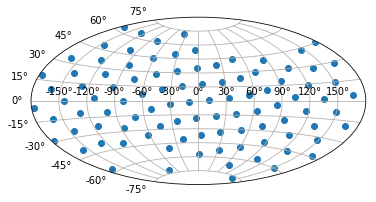

In [8]:
simulation.grid_plot()

<h2>Refining your Grid to get evener distribution</h2>

<p>Simulate physical points on the sphere and using coulomb repulsion to find distribution that maximises distance between all points.</p>

In [11]:
simulation.coulomb_refining(100)
simulation.generate_j2000(trigdat)
simulation.grid_plot()

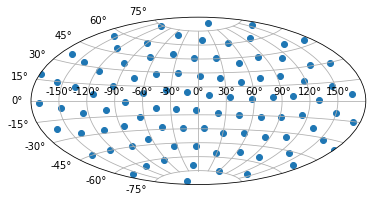

<p> As you can see we got a significantly better distribution...</p>

In [13]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [ 0.19620562 -0.70983501  0.67648919]
RA: 274d20m21.0933s 
DEC: -24d28m32.8414s


,0,1,2,3
0,Index=-2.0 Energy=300.0,Index=-2.0 Energy=533.33,Index=-2.0 Energy=766.66,Index=-2.0 Energy=1000.0
1,Index=-1.667 Energy=300.,Index=-1.667 Energy=533.,Index=-1.667 Energy=766.,Index=-1.667 Energy=1000
2,Index=-1.333 Energy=300.,Index=-1.333 Energy=533.,Index=-1.333 Energy=766.,Index=-1.333 Energy=1000
3,Index=-1.0 Energy=300.0,Index=-1.0 Energy=533.33,Index=-1.0 Energy=766.66,Index=-1.0 Energy=1000.0


<p>... while keeping the spectrum matrix. So no need to recalculate this again.</p>
<p>If you are not happy with your distribution you can always refine it even more with coulomb_refining and maybe a larger step number</p>

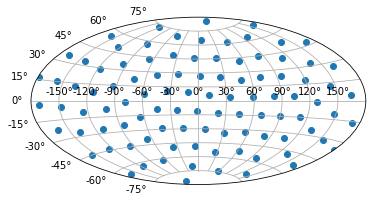

In [14]:
simulation.coulomb_refining(200)
simulation.generate_j2000(trigdat)
simulation.grid_plot()

In [15]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [ 0.20134753 -0.71771848  0.66658784]
RA: 274d07m46.8321s 
DEC: -23d43m00.4346s


,0,1,2,3
0,Index=-2.0 Energy=300.0,Index=-2.0 Energy=533.33,Index=-2.0 Energy=766.66,Index=-2.0 Energy=1000.0
1,Index=-1.667 Energy=300.,Index=-1.667 Energy=533.,Index=-1.667 Energy=766.,Index=-1.667 Energy=1000
2,Index=-1.333 Energy=300.,Index=-1.333 Energy=533.,Index=-1.333 Energy=766.,Index=-1.333 Energy=1000
3,Index=-1.0 Energy=300.0,Index=-1.0 Energy=533.33,Index=-1.0 Energy=766.66,Index=-1.0 Energy=1000.0


In [16]:
??simulation.setup()